In [1]:
using Distributed
ifelse(nprocs()<2, addprocs(3), nothing);

In [2]:
using Plots
using LinearAlgebra
using Revise
using LatticeQM

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /Users/skilledwolf/.julia/packages/Revise/VxkZO/src/packagedef.jl:1369


# Tutorial: Twisted honeycomb lattices

In [3]:
lat = Geometries2D.honeycomb_twisted(8)
Structure.Lattices.foldPC!(lat; shift=[1/3,1/3,0])

Twist α=3.89°   (n,m)=(8,1)


Lattice dimension:     2
Space dimension:       3
Number of atoms:       868
Non-spatial dimension: 2
Basis:
3×3 Matrix{Float64}:
 25.5147       -12.7574  0.0
 -8.74155e-15   22.0964  0.0
  0.0            0.0     1.0
Orbital/atom coordinates: 
5×868 Matrix{Float64}:
 0.333333  -0.628264  -0.588326  …   0.139785   0.176651   0.254992
 0.666667  -0.334869  -0.296467      0.505376   0.583717   0.625192
 1.5        1.5        1.5          -1.5       -1.5       -1.5
 0.0        1.0        0.0           0.0        0.0        0.0
 0.0        0.0        0.0           1.0        1.0        1.0

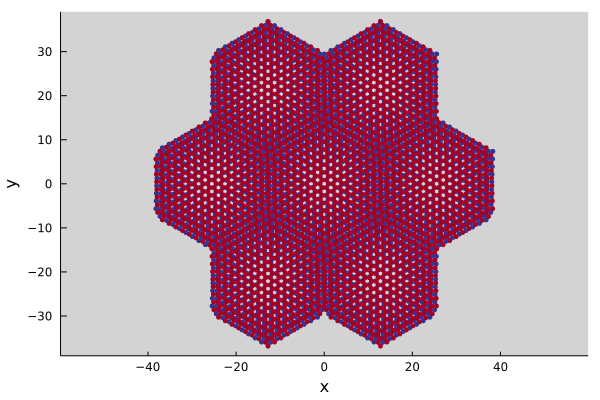

In [4]:
plot(lat, 3; supercell=Structure.Lattices.getneighborcells(lat, 1; halfspace=false, innerpoints=true, excludeorigin=false), sort="layer", markersize=3)

## Model

In [5]:
valley = Operators.valley(lat; spinhalf=false)
hops = Operators.graphene(lat; tz=0.45, format=:sparse, mode=:nospin) # specifying format is important here!
Operators.setfilling!(hops,0.5; nk=12)
nothing

### Bands

In [6]:
ks = kpath(lat, ["μ2", "γ", "κ", "κ'", "γ", "μ"]; num_points=100)
bands = getbands(hops, ks, valley; format=:sparse, num_bands=25)

Number of bands:      25
Number of k-points:   100
Number of observables: 1
Discrete Path: $\mu_2$→$\gamma$→$\kappa$→$\kappa'$→$\gamma$→$\mu$  (100 points)


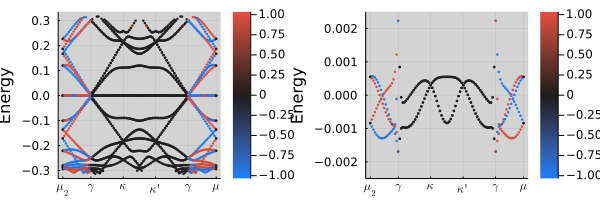

In [7]:
p1 = plot(bands; size=(300,250), markercolor=:diverging_bkr_55_10_c35_n256, colorbar=true)
p2 = plot(bands; ylim=(-0.0025,0.0025), size=(300,250), markercolor=:diverging_bkr_55_10_c35_n256, colorbar=true)

plot(p1,p2; size=(600,200))

In [8]:
hops = Operators.graphene(lat; mode=:spinhalf, format=:sparse, tz=0.45)
Operators.addrashba!(hops, lat, r -> 0.04 * sign(r[3]))
Operators.addzeeman!(hops, lat, r -> 0.04 * [0.0, 0.0, sign(r[3])])
Operators.setfilling!(hops,0.5; nk=12)

# kgrid = LatticeQM.Utils.randomgrid(;nk=8^2, rot_symmetry=6, B=Structure.getB(lat))
kgrid = LatticeQM.Utils.regulargrid(;nk=8^2)
ωs = collect(range(-0.0015, length=100, stop=0.001))
ldos = Spectrum.ldos(hops, kgrid, ωs; Γ=0.0005, format=:sparse, num_bands=25);

Computing LDOS...100%|██████████████████████████████████| Time: 0:00:22


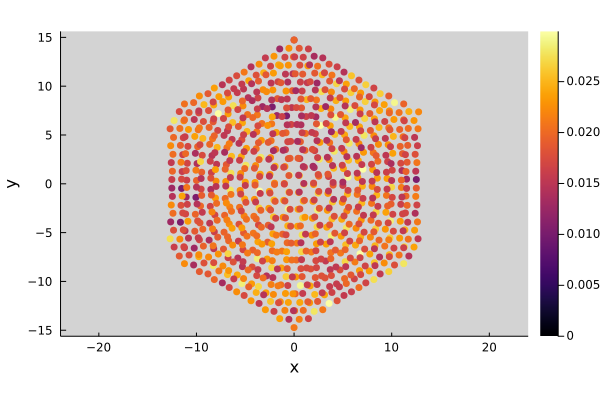

In [9]:
plot(lat, ldos; clims=(0,maximum(ldos)), markercolor=:inferno, colorbar=true)